In [13]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import scipy.sparse
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
data = "C:\\Users\\bence\\Projects\\BIO446\\McKinnon-Rosati-Laboratory\\Project 1\\Data\\adata_nk.h5ad"

In [3]:
adata = sc.read_h5ad(data)
adata.uns['log1p']["base"] = None # bug fix

print(adata.obs['sample'].value_counts())
print()
print('X matrix is sparse:', scipy.sparse.issparse(adata.X))
print('X size =', adata.X.shape)

sample
granuloma1    111
granuloma2     72
granuloma3     68
Name: count, dtype: int64

X matrix is sparse: False
X size = (251, 23693)


In [4]:
unique_celltype_sub = adata.obs['cell_type_edit'].unique()
print(unique_celltype_sub)

['NK']
Categories (1, object): ['NK']


In [5]:
replacement_dict = {
    'NK': 0
}

In [6]:
adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)

C:\Users\bence\AppData\Local\Temp\ipykernel_178576\975682991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)
C:\Users\bence\AppData\Local\Temp\ipykernel_178576\975682991.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['celltype'] = adata.obs['cell_type_edit'].replace(replacement_dict)


In [7]:
adata.obs['celltype']

AAAGATGTCTGCAAGT_sc69_1    0
AAAGCAACAGTTTACG_sc69_1    0
AATCCAGCAACAACCT_sc69_1    0
AATCCAGGTCCGTCAG_sc69_1    0
ACACCAATCAGTTGAC_sc69_1    0
                          ..
TGGTTCCGTGAGTATA_sc72_1    0
TGTTCCGAGTGGAGTC_sc72_1    0
TTGCGTCAGTGACATA_sc72_1    0
TTGGAACCAACGATCT_sc72_1    0
TTTGTCAGTATCAGTC_sc72_1    0
Name: celltype, Length: 251, dtype: category
Categories (1, int64): [0]

In [8]:
print("Unique values in 'celltype' column after replacement:", adata.obs['celltype'].unique())

Unique values in 'celltype' column after replacement: [0]
Categories (1, int64): [0]


In [9]:
cell_type_counts = adata.obs['cell_type_edit'].value_counts()

print("Number of cells in each cell type:")
print(cell_type_counts)

Number of cells in each cell type:
cell_type_edit
NK    251
Name: count, dtype: int64


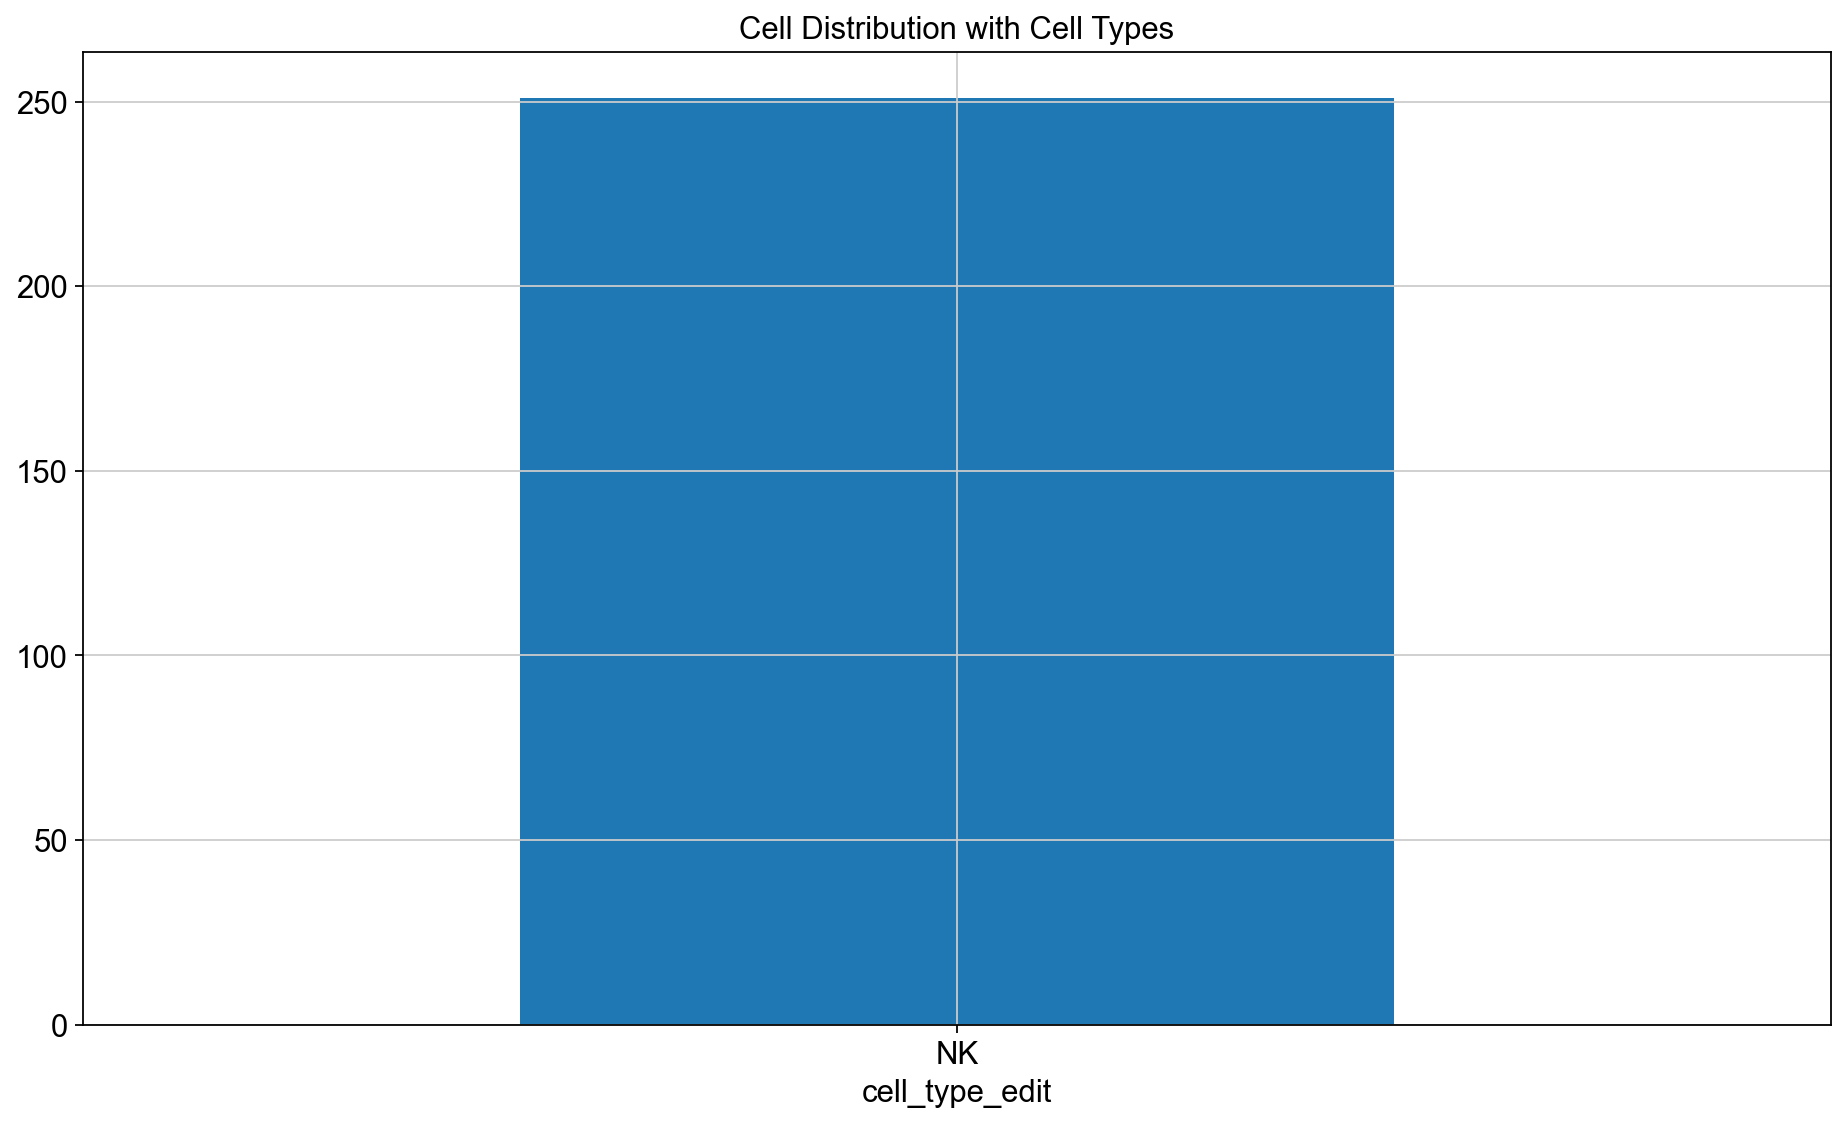

In [10]:
# cell distribution with cell types
y = adata.obs['cell_type_edit']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Cell Types')
y.value_counts().plot(kind='bar', rot=0)
plt.show()

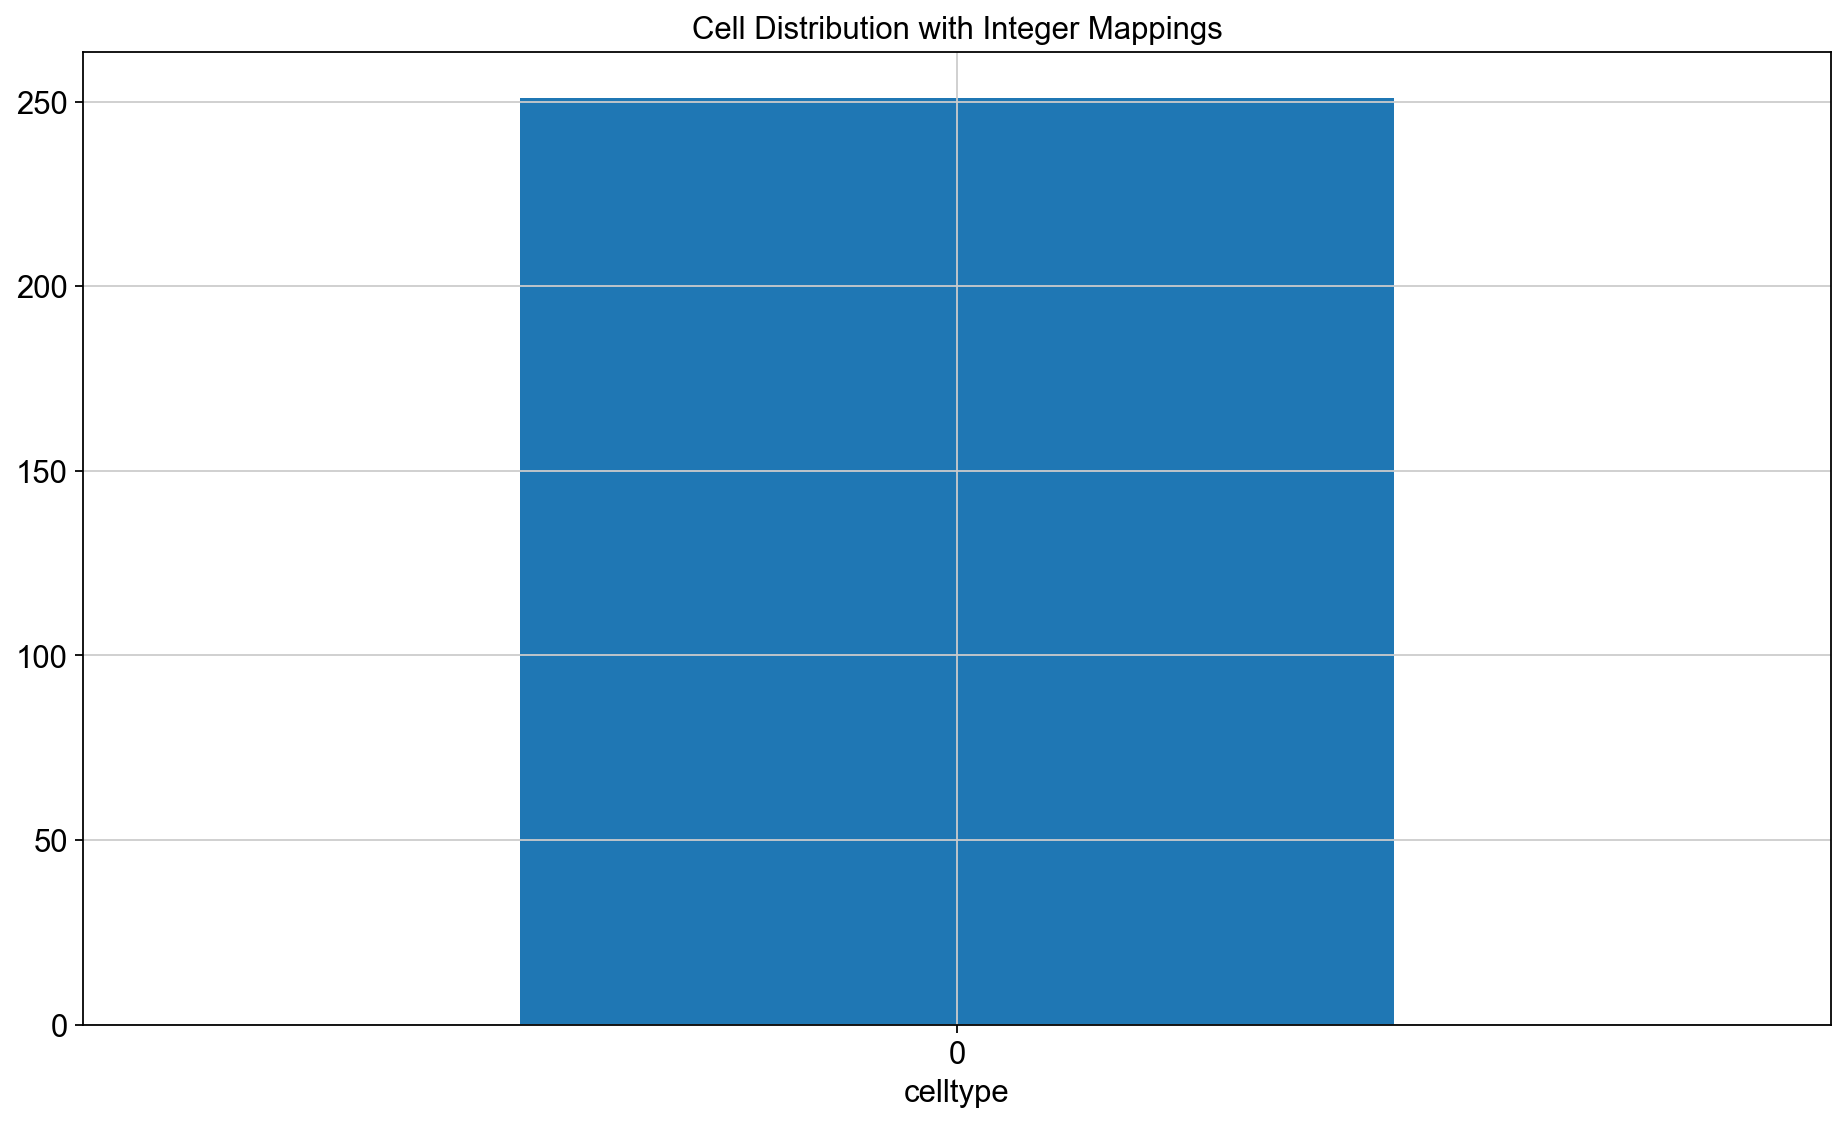

In [11]:
# cell distribution with int mappings
y = adata.obs['celltype']
plt.figure(figsize=(14, 8))
plt.title('Cell Distribution with Integer Mappings')
y.value_counts().plot(kind='bar', rot=0)
plt.show()